In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime

In [84]:
np.set_printoptions(suppress=True)

In [85]:
df = pd.read_csv('Final_dataset_T3.csv')
df.head()

,day_of_week,monthly_index,year,day_of_year,Covid Restrictions,Public_Holiday,Rainfall amount (millimetres),Minimum temperature (Degree C),Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),Total_Pedestrian_Count_per_day
0,4,1,2015,1,No restriction,Public Holiday,0.0,13.3,26.9,23.6,471563
1,5,1,2015,2,No restriction,Not a public holiday,0.0,15.4,38.8,26.8,389048
2,6,1,2015,3,No restriction,Not a public holiday,0.0,20.0,38.2,26.5,291761
3,7,1,2015,4,No restriction,Not a public holiday,4.6,16.3,21.4,25.2,382364
4,1,1,2015,5,No restriction,Not a public holiday,0.0,15.0,22.0,30.7,487220


In [86]:
#Check for missing values
df.isnull().any()

#The results showed that the data Rainfall and Daily Global Solar Exposure contained missing values

day_of_week                             False
monthly_index                           False
year                                    False
day_of_year                             False
Covid Restrictions                      False
Public_Holiday                          False
Rainfall amount (millimetres)            True
Minimum temperature (Degree C)          False
Maximum temperature (Degree C)          False
Daily global solar exposure (MJ/m*m)     True
Total_Pedestrian_Count_per_day          False
dtype: bool

In [87]:
#Check how many missing values there are
df.count()

day_of_week                             2132
monthly_index                           2132
year                                    2132
day_of_year                             2132
Covid Restrictions                      2132
Public_Holiday                          2132
Rainfall amount (millimetres)           2124
Minimum temperature (Degree C)          2132
Maximum temperature (Degree C)          2132
Daily global solar exposure (MJ/m*m)    2131
Total_Pedestrian_Count_per_day          2132
dtype: int64

In [88]:
#As can be seen from the above results, there are few missing values. 
#As a time series, adjacent data are used to make up here.
df['Rainfall amount (millimetres)'] = df['Rainfall amount (millimetres)'].interpolate(method='nearest')
df['Daily global solar exposure (MJ/m*m)'] = df['Daily global solar exposure (MJ/m*m)'].interpolate(method='nearest')

In [89]:
#The missing values are checked again, and there are no missing values
df.isnull().any()

day_of_week                             False
monthly_index                           False
year                                    False
day_of_year                             False
Covid Restrictions                      False
Public_Holiday                          False
Rainfall amount (millimetres)           False
Minimum temperature (Degree C)          False
Maximum temperature (Degree C)          False
Daily global solar exposure (MJ/m*m)    False
Total_Pedestrian_Count_per_day          False
dtype: bool

In [90]:
#Calculate the statistical characteristics of discrete variables
df.describe(include=['O'])

,Covid Restrictions,Public_Holiday
count,2132,2132
unique,2,2
top,No restriction,Not a public holiday
freq,1901,2053


In [91]:
#Calculate the statistical characteristics of numerical variables
round(df.describe(),3)

,day_of_week,monthly_index,year,day_of_year,Rainfall amount (millimetres),Minimum temperature (Degree C),Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),Total_Pedestrian_Count_per_day
count,2132.000,2132.000,2132.000,2132.000,2132.000,2132.000,2132.000,2132.000,2132.000
mean,4.002,6.378,2017.430,178.756,1.741,11.572,20.392,14.772,600794.452
std,1.999,3.391,1.679,103.668,4.703,4.293,6.262,7.924,190162.713
min,1.000,1.000,2015.000,1.000,0.000,0.600,9.000,0.700,61691.000
25%,2.000,3.000,2016.000,89.000,0.000,8.500,15.600,8.200,530528.750
50%,4.000,6.000,2017.000,178.000,0.000,11.300,19.100,12.800,626988.000
75%,6.000,9.000,2019.000,267.000,1.200,14.600,23.900,20.700,722996.500
max,7.000,12.000,2020.000,366.000,57.200,28.000,43.500,33.300,1149216.000


In [92]:
#Creat the new column "Date" converts days to dates
def date_conversation(year,day):
    first_day=datetime.datetime(year,1,1)
    date=first_day+datetime.timedelta(int(day-1))
    date=datetime.datetime.strftime(date,'%Y%m%d')
    return date

df['Date'] = None
for i in range(len(df)):
  df.Date[i]=date_conversation(df.year[i],df.day_of_year[i])

df['Date'] = pd.to_datetime(df['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


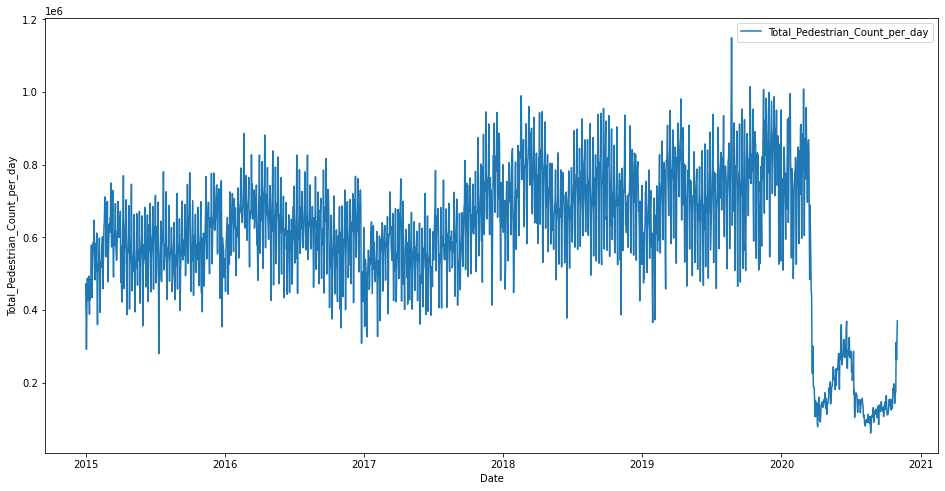

In [95]:
df.index=df.Date
#df=df.drop(['ID'],1)
ts=df['Total_Pedestrian_Count_per_day']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Total_Pedestrian_Count_per_day')
plt.xlabel('Date')
plt.ylabel('Total_Pedestrian_Count_per_day')
plt.legend(loc='best')

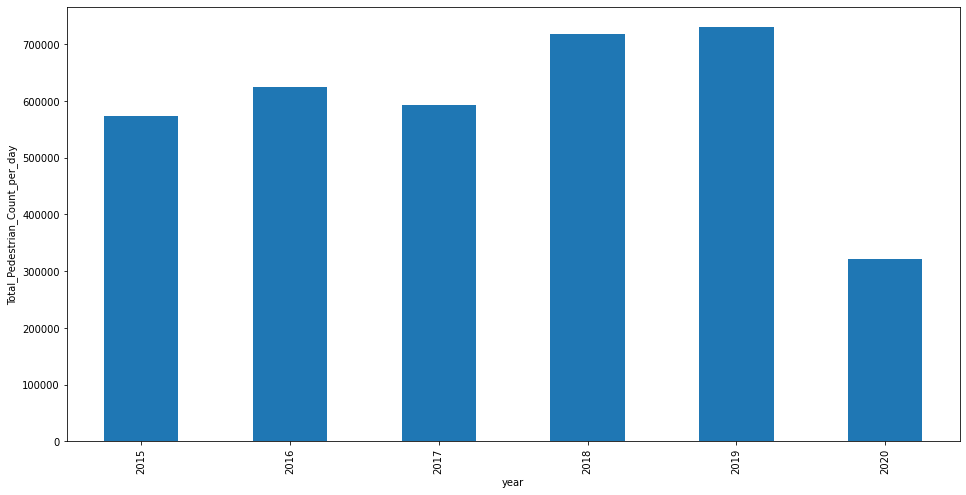

In [103]:

df.groupby(['year'])['Total_Pedestrian_Count_per_day'].mean().plot.bar(figsize=(16,8),ylabel='Total_Pedestrian_Count_per_day')

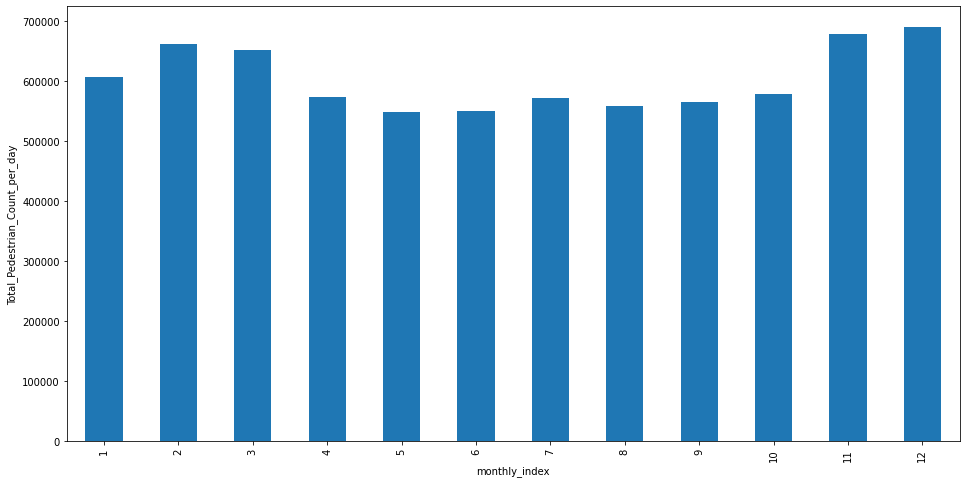

In [104]:
df.groupby(['monthly_index'])['Total_Pedestrian_Count_per_day'].mean().plot.bar(figsize=(16,8),ylabel='Total_Pedestrian_Count_per_day')

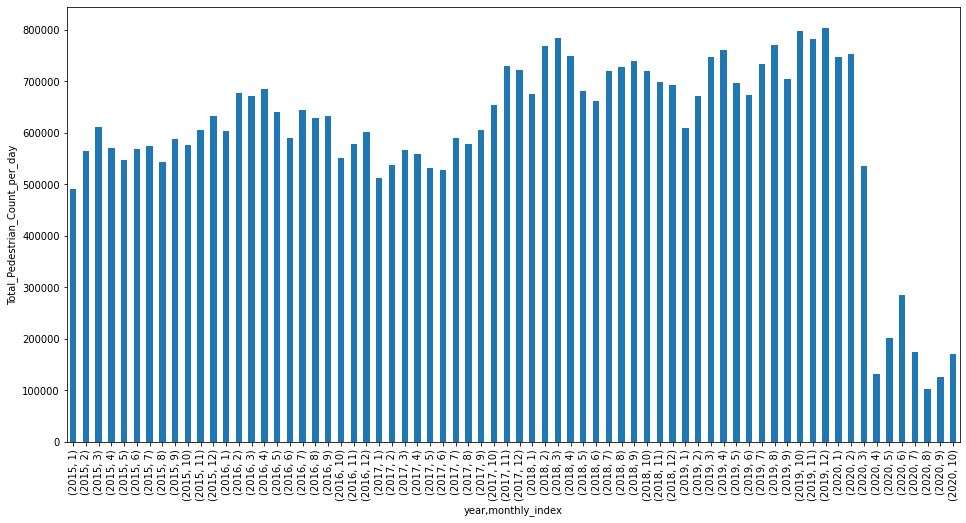

In [105]:
temp=df.groupby(['year','monthly_index'])['Total_Pedestrian_Count_per_day'].mean().plot.bar(figsize=(16,8),ylabel='Total_Pedestrian_Count_per_day')

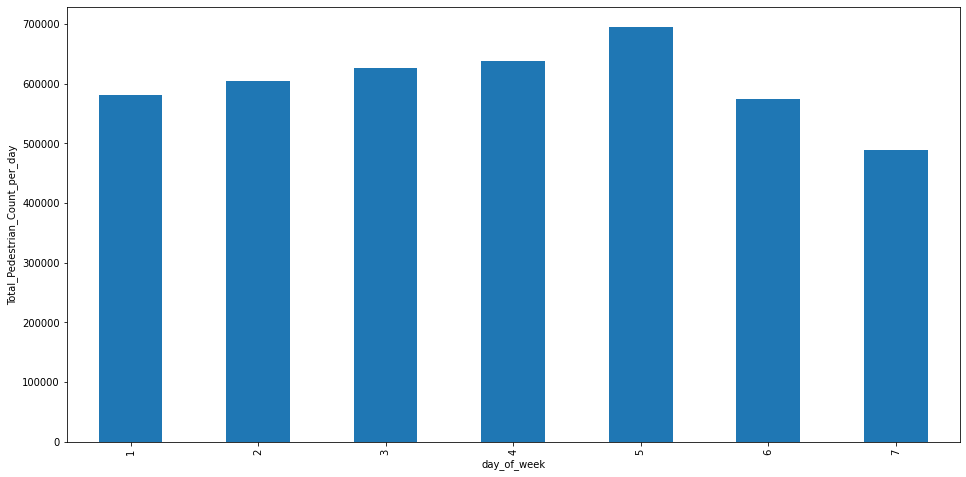

In [106]:
df.groupby(['day_of_week'])['Total_Pedestrian_Count_per_day'].mean().plot.bar(figsize=(16,8),ylabel='Total_Pedestrian_Count_per_day')